<a href="https://colab.research.google.com/github/pahvani/NLP_PROJECTS/blob/main/Document%20Similarity%20Finder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Original Documents:
                                                                                          Document
         Artificial Intelligence is transforming industries through automation and data insights.
Machine Learning, a branch of AI, allows systems to learn from data without explicit programming.
   Natural Language Processing enables computers to understand and interact using human language.
           Climate change is one of the most pressing global challenges, requiring urgent action.
                Renewable energy sources like solar and wind are key to combating climate change.
          Deep learning is a powerful technique in AI that uses neural networks with many layers.

Preprocessed Documents:
                                                                                          Document                                                                               Cleaned
         Artificial Intelligence is transforming industries through automation and 

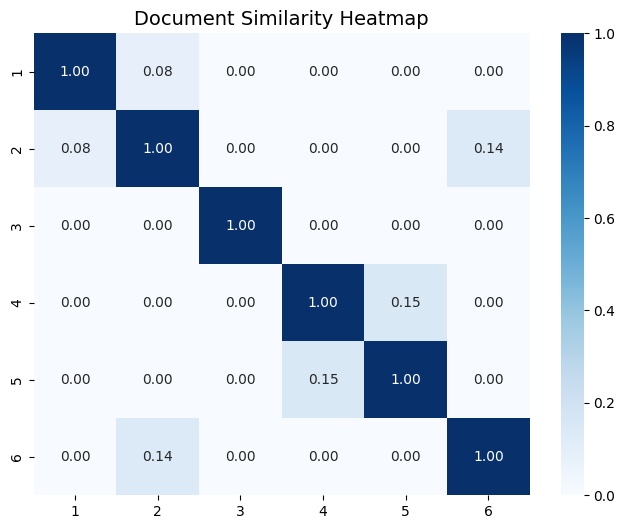


Top 3 Most Similar Document Pairs:
Documents 4 & 5 → Similarity Score: 0.15
Documents 2 & 6 → Similarity Score: 0.14
Documents 1 & 2 → Similarity Score: 0.08


In [ ]:

import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

documents = [
    "Artificial Intelligence is transforming industries through automation and data insights.",
    "Machine Learning, a branch of AI, allows systems to learn from data without explicit programming.",
    "Natural Language Processing enables computers to understand and interact using human language.",
    "Climate change is one of the most pressing global challenges, requiring urgent action.",
    "Renewable energy sources like solar and wind are key to combating climate change.",
    "Deep learning is a powerful technique in AI that uses neural networks with many layers."
]

df = pd.DataFrame(documents, columns=["Document"])
print("Original Documents:\n", df.to_string(index=False))
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(tokens)
df["Cleaned"] = df["Document"].apply(preprocess_text)
print("\nPreprocessed Documents:\n", df.to_string(index=False))
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df["Cleaned"])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
sim_df = pd.DataFrame(cosine_sim, index=range(1, len(documents)+1), columns=range(1, len(documents)+1))
print("\nCosine Similarity Matrix:\n", sim_df)
plt.figure(figsize=(8,6))
sns.heatmap(sim_df, annot=True, cmap="Blues", fmt=".2f")
plt.title("Document Similarity Heatmap", fontsize=14)
plt.show()
pairs = []
n = cosine_sim.shape[0]

for i in range(n):
    for j in range(i+1, n):
        pairs.append(((i+1, j+1), cosine_sim[i][j]))

pairs = sorted(pairs, key=lambda x: x[1], reverse=True)

print("\nTop 3 Most Similar Document Pairs:")
for pair, score in pairs[:3]:
    print(f"Documents {pair[0]} & {pair[1]} → Similarity Score: {score:.2f}")

